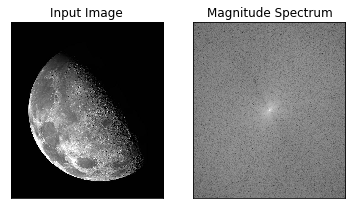

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/moon.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

In [19]:
#ideal low pass
import cv2
import numpy as np
from matplotlib import pyplot as plt

#black = cv2.imread('images/black.PNG')
a = cv2.imread('images/moon.jpg',0)
dft = cv2.dft(np.float32(a),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
#------------------------------

u = a.shape[0]
v = a.shape[1]
d2_array1 = np.zeros((u,v,2),np.uint8)
c1 = u/2
c2 = v/2
d0 = 30
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r <= d0:
            d2_array1[i,j] = 1
#

#----------------------------------

convelution1 = d2_array1 * dft_shift  

f_ishift1 = np.fft.ifftshift(convelution1)​convelution1 = d2_array1 * dft_shift  

f_ishift1 = np.fft.ifftshift(convelution1)
img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])
plt.show()
img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-19-11d44e05800c>, line 30)

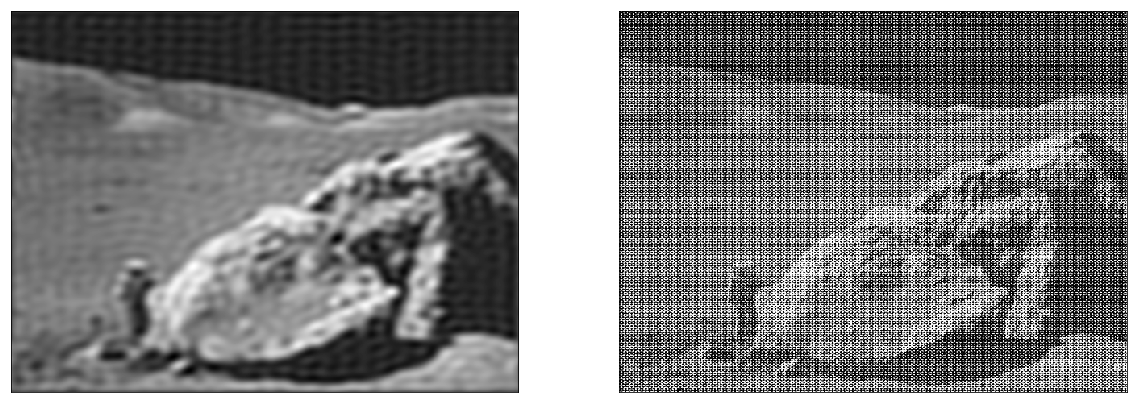

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

#butterworth
a = cv2.imread('images/moonwalk.jpg',0)
n = cv2.imread('images/moonwalk.jpg',0)
dft = cv2.dft(np.float32(a),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
#------------------------------

u = a.shape[0]
v = a.shape[1]
d2_array2 = np.zeros((u,v,2),np.uint8)
c1 = u/2
c2 = v/2
d0 = 80
t1=20
t2=2*t1

for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r <= d0:
            d2_array2[i,j] = 1/(1 + (r/d0)**t2)
        
#----------------------------------

convelution2 = d2_array2 * dft_shift  
fig = plt.figure(figsize=(20,20))

f_ishift2 = np.fft.ifftshift(convelution2)
img_back2 = cv2.idft(f_ishift2)
img_back2 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])

plt.subplot(121),plt.imshow(img_back2, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(n, cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image

a = cv2.imread('images/moon.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)

M = d.shape[0]
N = d.shape[1]
array3 = numpy.ones((u,v))
c1 = u/2
c2 = v/2
d0 = 30.0 
t1 = 2*d0

for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)

        array3[i,j] = math.exp(-r**2/t1**2)

array3 = scipy.misc.toimage(array3)
convolution3 = d * array3
e3 = abs(fftim.ifft2(convolution3))
fig = plt.figure(figsize=(10,10))


plt.subplot(121),plt.imshow(array3, cmap = 'gray')
plt.title('Gassuian Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(122),plt.imshow(e, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()

ValueError: operands could not be broadcast together with shapes (640,554) (474,630) 

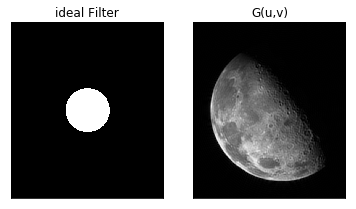

In [132]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image

black = cv2.imread('images/black.PNG')
a = cv2.imread('images/moon.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)


u = a.shape[0]
v = a.shape[1]
d2_array1 = np.zeros((u,v))
c1 = u/2
c2 = v/2
d0 = 80
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r <= d0:
            d2_array1[i,j] = 1
            
#
convelution1 = d2_array1 * d  

e1 = abs(fftim.ifft2(convelution1))
plt.subplot(121),plt.imshow(d2_array1, cmap = 'gray')
plt.title('ideal Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(122),plt.imshow(e1, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()

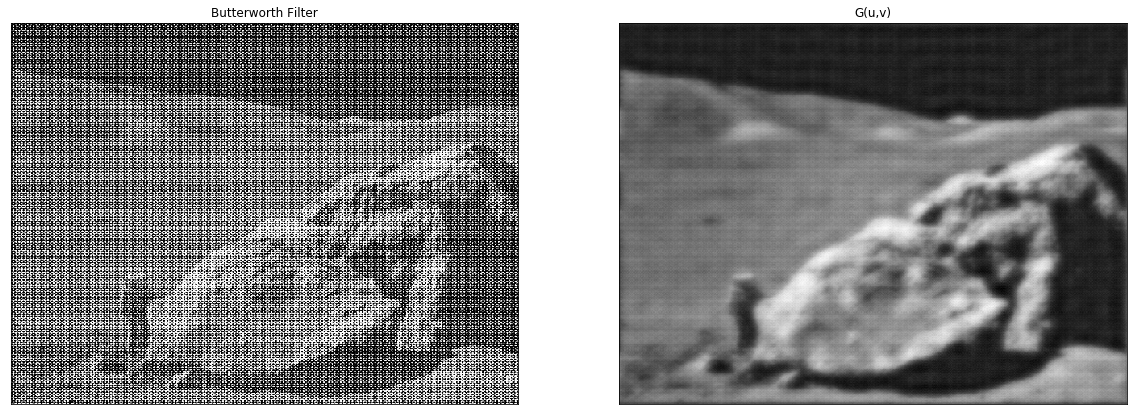

In [36]:
#butter
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
import cv2
import numpy as np
from matplotlib import pyplot as plt
a = cv2.imread('images/moonwalk.jpg',0)
n = cv2.imread('images/moonwalk.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)

u = d.shape[0]
v = d.shape[1]
array2 = numpy.ones((u,v))
c1 = u/2 
c2 = v/2
d0 = 20
t2 = 2*1
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r > d0:
            array2[i,j] = 1/(1 + (r/d0)**t2)

array2 = scipy.misc.toimage(array2)
convolution2 = d * array2 
e2 = abs(fftim.ifft2(convolution2))
fig = plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(n , cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(122),plt.imshow(e2, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()

## 